<a href="https://colab.research.google.com/github/PrabhakarSingh07/python-for-datascience-training/blob/main/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 5.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=f8f41dc56ed33095519f8ebd5c1ae1ac586b1ad5ed12af1a161d846509f3f6ac
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [4]:
#import numpy and skfuzzy libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [5]:
#Define input and output
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [6]:
quality.automf(3)
service.automf(3)

In [7]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

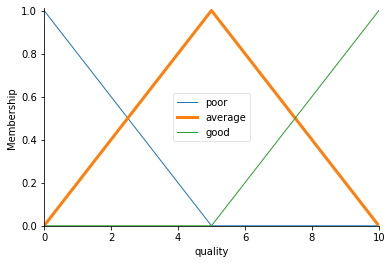

In [8]:
quality['average'].view()

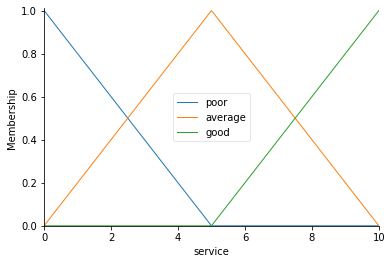

In [9]:
service.view()

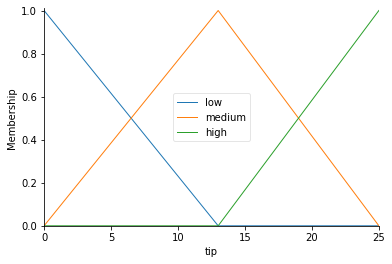

In [10]:
tip.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5ad4b96250>)

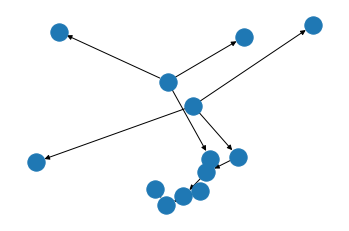

In [11]:
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['low'])
rule1.view
rule1.view()

In [12]:
rule2 = ctrl.Rule(service['average'] & service['average'], tip['medium'])

In [14]:
rule3 = ctrl.Rule(service['good'] & service['good'], tip['high'])

In [15]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [16]:
tipping.input['quality'] = 7.5
tipping.input['service'] = 9.5

In [17]:
tipping.compute()

In [18]:
print(tipping.output['tip'])

18.482738780207132


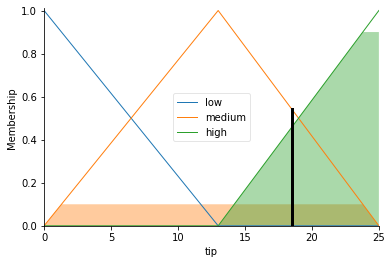

In [19]:
tip.view(sim=tipping)